<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Формирование-выборок" data-toc-modified-id="Формирование-выборок-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Формирование выборок</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Модель-без-учета-баланса" data-toc-modified-id="Модель-без-учета-баланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель без учета баланса</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки-(upsample)" data-toc-modified-id="Увеличение-выборки-(upsample)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки (upsample)</a></span></li><li><span><a href="#Уменьшение-выборки-(downsample)" data-toc-modified-id="Уменьшение-выборки-(downsample)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки (downsample)</a></span></li><li><span><a href="#AUC-ROC" data-toc-modified-id="AUC-ROC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>AUC-ROC</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#ВЫВОД" data-toc-modified-id="ВЫВОД-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ВЫВОД</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('Churn.csv')

In [3]:
    # обзор: первые 5 строк таблицы
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Описание данных:** <br><br>
**Признаки:**<br> RowNumber — индекс строки в данных <br> CustomerId — уникальный идентификатор клиента <br> Surname — фамилия <br> CreditScore — кредитный рейтинг <br> Geography — страна проживания <br> Gender — пол <br> Age — возраст <br> Tenure — сколько лет человек является клиентом банка <br> Balance — баланс на счёте <br> NumOfProducts — количество продуктов банка, используемых клиентом <br> 	HasCrCard — наличие кредитной карты <br> IsActiveMember — активность клиента <br> EstimatedSalary — предполагаемая зарплата <br><br> **Целевой признак:** <br>Exited — факт ухода клиента

In [4]:
# размер таблицы
df.shape

(10000, 14)

In [5]:
# сводная информация по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# названия столбцов
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df = df.rename(columns = {'RowNumber': 'Row_Number', 'CustomerId': 'Customer_Id', 
                     'CreditScore': 'Credit_Score', 'NumOfProducts': 'Num_Of_Products', 
                     'HasCrCard': 'Has_Cr_Card', 'IsActiveMember': 'Is_Active_Member', 
                     'EstimatedSalary': 'Estimated_Salary'})

In [9]:
# что бы избежать в дальнейшем ошибок в названии столбцов, приведем их к нижнему регистру
df.columns = df.columns.str.lower()
# названия столбцов
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Названия столбцов приведены к нижнему регистру.

In [10]:
# проверка наличия дубликатов
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [11]:
# проверим пропуски в данных
df.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [12]:
print('Процент пропусков в столбце "tenure" (сколько лет человек является клиентом банка):')
print(f"{(df['tenure'].isna().mean()):.2%}")

Процент пропусков в столбце "tenure" (сколько лет человек является клиентом банка):
9.09%


In [13]:
# строки с пропущенными значениями 'tenure'
df[df['tenure'].isnull() == True].head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


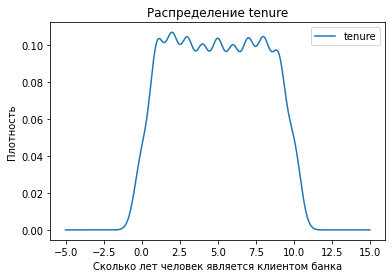

In [14]:
df['tenure'].plot(kind='kde')
plt.legend()
plt.xlabel('Сколько лет человек является клиентом банка')
plt.ylabel('Плотность')
plt.title('Распределение tenure')
plt.show()

Заполним пропуски столбца 'tenure' (сколько лет человек является клиентом банка) 
на 0.

In [15]:
print("Уникальные значения в столце 'tenure':", df['tenure'].sort_values().unique())
print("Количество:", len(df['tenure'].unique()))
print('Медиана', df['tenure'].median())
# заменим пропушенные значения на медиану
df['tenure'] = df['tenure'].fillna(df['tenure'].median()).astype('int64')
print('После замены:')
print("Уникальные значения в столце 'tenure':", df['tenure'].sort_values().unique())
print("Количество:", len(df['tenure'].unique()))

Уникальные значения в столце 'tenure': [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
Количество: 12
Медиана 5.0
После замены:
Уникальные значения в столце 'tenure': [ 0  1  2  3  4  5  6  7  8  9 10]
Количество: 11


In [16]:
print('После замены:')
print("Уникальные значения в столце 'tenure':", df['tenure'].sort_values().unique())
print("Количество:", len(df['tenure'].unique()))

После замены:
Уникальные значения в столце 'tenure': [ 0  1  2  3  4  5  6  7  8  9 10]
Количество: 11


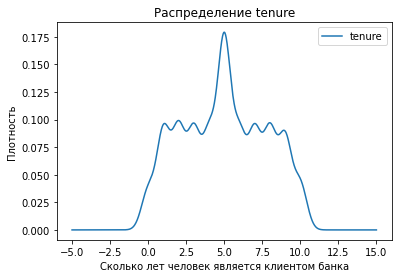

In [17]:
df['tenure'].plot(kind='kde')
plt.legend()
plt.xlabel('Сколько лет человек является клиентом банка')
plt.ylabel('Плотность')
plt.title('Распределение tenure')
plt.show()

In [18]:
print("Уникальные значения в столце 'geography':", df['geography'].unique(), "Количество:",
      len(df['geography'].unique()))
print("Уникальные значения в столце 'gender':", df['gender'].unique(), "Количество:", 
      len(df['gender'].unique()))

Уникальные значения в столце 'geography': ['France' 'Spain' 'Germany'] Количество: 3
Уникальные значения в столце 'gender': ['Female' 'Male'] Количество: 2


In [19]:
print("Уникальные значения в столце 'age':", df['age'].sort_values().unique(), "Количество:", 
      len(df['age'].unique()))

Уникальные значения в столце 'age': [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 88 92] Количество: 70


In [20]:
print("Уникальные значения в столце 'num_of_products':", df['num_of_products'].sort_values().unique(), 
      "Количество:", len(df['num_of_products'].unique()))

Уникальные значения в столце 'num_of_products': [1 2 3 4] Количество: 4


In [21]:
print("Уникальные значения в столце 'is_active_member':", df['is_active_member'].sort_values().unique(), 
      "Количество:", len(df['is_active_member'].unique()))

Уникальные значения в столце 'is_active_member': [0 1] Количество: 2


**Вывод** <br> В исходных данных 10000 строк (объекты) и 14 столбцов (признаки: 13 признаков и 1 целевой признак). <br> - Дубликаты отсутствуют. <br> - Пропуски данных были только в 1 столбце ("tenure" (сколько лет человек является клиентом банка) и составили небольшой процент = 9,09. Заменила эти пропуски на наименьшее значение 0 сменили тип данных на int (целое число). <br> - В целевом признаке пропуски отсутствуют. <br> - Названия столбцов приведены к нижнему регистру во избежание ошибок в дальнейшем. <br> - В нашем распоряжении обучающий набор данных (признаки) и целевой признак, который нужно предсказать по остальным признакам. Такие задачи относятся к "обучению с учителем" / бинарная (двоичная) классификация (категориальный целевой признак).

## Исследование задачи

Ненужные признаки снижают скорость обучения модели. Перед обучение необходимо удалить лишние данные, имеющие: высокий процент пропущенных значений (таких у нас нет); коллинеарность (сильная корреляция); низкая важность; единственное значение.<br> В наборе данных есть некоторые столбцы, которые имеют категориальные значения, и мы хотим использовать их для обучения нашей модели. В этом случае мы должны преобразовать значения категорий в числовые типы.

### Подготовка данных

In [22]:
# размер данных
df.shape

(10000, 14)

Удалим лишние столбцы: явные дубликаты проверены, следовательно можно удалить столбец 'rownumber' (индекс строки в данных), так как в таблице есть индексация и столбец 'customerid' (уникальный идентификатор клиента), так как они не несут ценности для обучения модели

In [23]:
df = df.drop(['row_number', 'customer_id'], axis=1)
df.head(3)

,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [24]:
# проверим уникальные значения в столбце 'surname'
print("Уникальные значения в столце 'surname':", df['surname'].unique(), "Количество:",
      len(df['surname'].unique()))

Уникальные значения в столце 'surname': ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] Количество: 2932


Уникальных значений в столбце 'surname' (фамилия) 2932, это очень много для преобразования категориального признака в числовой - удаляем этот столбец

In [25]:
df = df.drop(['surname'], axis=1)
df.head(3)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [26]:
# размер данных
df.shape

(10000, 11)

In [27]:
# сводная информация по таблице
display(df.head())
display(df.describe())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Осталось 11 столбцов. Столбцы возраста и зарплаты корректны: возраст от 18 до 92, предполагаемая зарплата от 11 до 199992. Далее проверяем корреляцию признаков.

In [28]:
df.corr()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
credit_score,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
balance,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.015989,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Проверили Все признаки слабо коррелируют между собой и с целевым признаком. Следовательно, данных с сильной корреляцией нет. "Мультиколлинеарности" нет.

Применим прямое кодирование (признаки должны быть численные). Оne-hot-encoding работает со всеми моделями.

Категориальные признаки: 'geography'(страна проживания) - содержит 3 уникальных значения и 'gender' (пол) - содержит 2 уникальных значения, преобразуем в числовые с помощью прямого кодирования. Преобразуем 'geography' и 'gender' техникой OHE. Соответственно, в таблицу, избегая дамми-ловушки, добавится 2 и 1 новых столбца соответственно.

In [29]:
# one-hot-encoding: получение дамми-признаков (избегая дамми-ловушки)
df_one = pd.get_dummies(df, drop_first=True)
df_one.head(3)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [30]:
# размер данных
df_one.shape

(10000, 12)

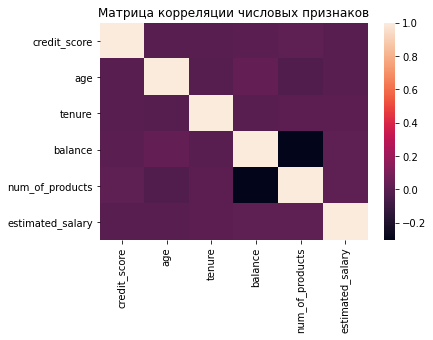

In [31]:
# численные признаки
list_numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
sns.heatmap(df_one.loc[:, list_numeric_features].corr(),
            xticklabels=df_one.loc[:, list_numeric_features].corr().columns,
            yticklabels=df_one.loc[:, list_numeric_features].corr().columns)
plt.title('Матрица корреляции числовых признаков')
plt.show()

Получили 12 столбцов. Сильной корреляции среди признаков нет. Данные готовы для формирования выборок.


### Формирование выборок

Выделяем признаки и целевой признак

In [32]:
# признаки
features = df_one.drop(['exited'], axis=1)

In [33]:
# целевой признак
target = df_one['exited']

Целевой признак 'exited' (факт ухода клиента) - признак оттока, бинарный (1 - потеря клиента, отток).<br> Посмотрим на распределение целевого признака - оттока клиентов.

In [34]:
df_one['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

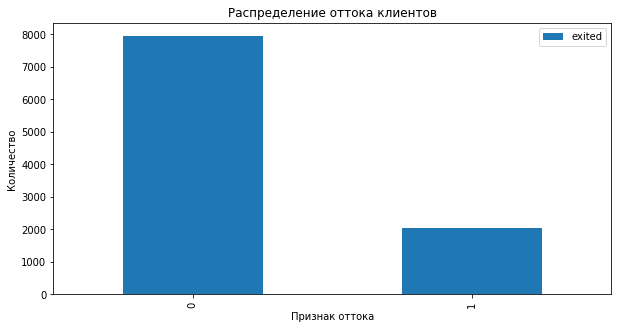

In [35]:
df_one['exited'].value_counts().plot(kind='bar', label='exited', figsize=(10, 5))
plt.legend()
plt.xlabel('Признак оттока')
plt.ylabel('Количество')
plt.title('Распределение оттока клиентов')
plt.show()

Соотношение оттока клиентов к оставшимся клиентам = 1/4. Выявлен дисбаланс классов, позже нужно это изменить для повышения качества обучения модели. Сначала обучим модель без исправления дисбаланса, для того чтобы сравнить результаты. Значений в отрицательном классе больше, чем в положительном почти в 4 раза.

Обучающий (тренировочный) набор данных (выборка) - набор данных, на котором будет обучаться алгоритммашинного обучения.<br> Тестовая выборка необходима для оценки работы готовой модели. Это набор данных, на котором будет проверятся качество обученной модели, что бы точно знать, что модель не вызубрила ответы.<br> Валидационная выборка - набор данных, извлекаемый из исходного датасета, на которой проверяется качество работы алгоритма во время обучения модели. При валидации модели выбирают набор гиперпараметров, который соответствует лучшей модели. <br> Спрятанной выборки у нас нет, значит от основной для валидации отделяем 20%, и 20% для тестовой. Соотношение получается 3/1/1 (обучающая 60%, тестовая 20% и валидационная 20%).

In [36]:
# разделяем данные, выделяем обучающую и валидационную + тестовую (60/40)
df_one_train, df_one_train_testing = train_test_split(df_one, test_size=0.4, random_state=12345)

In [37]:
# разделяем df_one_train_testing, выделяем валидационную и тестовую (50/50)
df_one_test, df_one_valid = train_test_split(df_one_train_testing, test_size=0.5, random_state=12345)

df_one_train - обучающая выборка<br>
df_one_train_testing - валидационная + тестовая выборки<br>
df_one_test - тестовая выборка<br>
df_one_valid - валидационная выборка<br>

Создаем переменные для признаков и целевого признака для обучающей, валидационной и тестовой выборки:

In [38]:
# для обучающей
features_train = df_one_train.drop(['exited'], axis=1)
target_train = df_one_train['exited']

In [39]:
# для тестовой
features_test = df_one_test.drop(['exited'], axis=1)
target_test = df_one_test['exited']

In [40]:
# для валидационной
features_valid = df_one_valid.drop(['exited'], axis=1)
target_valid = df_one_valid['exited']

In [41]:
# размеры полученных выборок
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


### Масштабирование признаков

Следующим шагом модели машинного обучения является масштабирование функций. Это метод стандартизации обучающего набора данных в определенном диапазоне. При масштабировании объектов все значения сохраняются в одном диапазоне и в одном масштабе, чтобы ни одна переменная не доминировала над другой переменной.

Для масштабирования функций мы используем класс StandardScaler - стандартизация данных. Создадим объект этой структуры и настроим (вычислим среднее и дисперсию) его на обучающих данных.

In [42]:
# список всех численных признаков
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 
           'estimated_salary']

In [43]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# масштабируем числовые признаки обучающей выборки
features_train[numeric] = scaler.transform(features_train[numeric])
# масштабируем числовые признаки тестовой выборки
features_test[numeric] = scaler.transform(features_test[numeric])
# масштабируем числовые признаки валидационной выборки
features_valid[numeric] = scaler.transform(features_valid[numeric])
print('Обучающая')
display(features_train.head())
print(features_train.shape)

Обучающая


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,0.642466,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,-1.556504,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,-1.556504,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,0.642466,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,-1.556504,0,1.524268,1,0,0


(6000, 11)


### Модель без учета баланса

#### Логистическая регрессия

In [44]:
# обучение с помощью модели логистической регрессии
model_log = LogisticRegression(random_state=12345, solver = 'liblinear')
model_log.fit(features_train, target_train)
prediction_valid_log = model_log.predict(features_valid)
print('Итог LogisticRegression')
print('Accuracy LogisticRegression:', accuracy_score(target_valid, prediction_valid_log))
print('Полнота LogisticRegression: ', recall_score(target_valid, prediction_valid_log))
print('Точность LogisticRegression:', precision_score(target_valid, prediction_valid_log))
print('F1 LogisticRegression:      ',f1_score(target_valid, prediction_valid_log))
print('Матрица ошибок LogisticRegression:')
print(confusion_matrix(target_valid, prediction_valid_log))

Итог LogisticRegression
Accuracy LogisticRegression: 0.7915
Полнота LogisticRegression:  0.1867612293144208
Точность LogisticRegression: 0.5197368421052632
F1 LogisticRegression:       0.27478260869565213
Матрица ошибок LogisticRegression:
[[1504   73]
 [ 344   79]]


#### Дерево решений

In [45]:
# обучение с помощью модели дерево решений
best_accuracy = 0
best_F1 = 0
best_depth = 0
for depth in range(1, 15):
    model_dr = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dr.fit(features_train, target_train)
    prediction_valid_dr = model_dr.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, prediction_valid_dr))
    print(f1_score(target_valid, prediction_valid_dr))
    if accuracy_score(target_valid, prediction_valid_dr) > best_accuracy:
        if f1_score(target_valid, prediction_valid_dr) > best_F1:
            best_accuracy = accuracy_score(target_valid, prediction_valid_dr)
            best_F1 = f1_score(target_valid, prediction_valid_dr)
            best_depth = depth
print()
print('Итог DecisionTreeClassifier')
print('Accuracy DecisionTreeClassifier:', best_accuracy)
print('F1 DecisionTreeClassifier:      ', best_F1)
print('Глубина дерева:                 ', best_depth)

max_depth = 1 : 0.7885
0.0
max_depth = 2 : 0.817
0.4986301369863014
max_depth = 3 : 0.83
0.3795620437956204
max_depth = 4 : 0.832
0.48307692307692307
max_depth = 5 : 0.842
0.5015772870662459
max_depth = 6 : 0.848
0.5337423312883436
max_depth = 7 : 0.8375
0.4976816074188563
max_depth = 8 : 0.833
0.48773006134969327
max_depth = 9 : 0.8275
0.5254470426409904
max_depth = 10 : 0.8265
0.5035765379113019
max_depth = 11 : 0.815
0.4986449864498645
max_depth = 12 : 0.807
0.49343832020997375
max_depth = 13 : 0.8035
0.490272373540856
max_depth = 14 : 0.799
0.48854961832061067

Итог DecisionTreeClassifier
Accuracy DecisionTreeClassifier: 0.848
F1 DecisionTreeClassifier:       0.5337423312883436
Глубина дерева:                  6


#### Случайный лес

In [46]:
# обучение с помощью модели случайный лес

best_model_sl = None
best_accuracy = 0
best_F1 = 0
best_depth = 0
best_est = 0
for est in range(5, 50, 5):
    for depth in range(1, 20):
        model_sl = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_sl.fit(features_train, target_train)
        prediction_valid_sl = model_sl.predict(features_valid)
        if accuracy_score(target_valid, prediction_valid_sl) > best_accuracy:
            if f1_score(target_valid, prediction_valid_sl) > best_F1:
                best_model = best_model_sl
                best_accuracy = accuracy_score(target_valid, prediction_valid_sl)
                best_F1 = f1_score(target_valid, prediction_valid_sl)
                best_est = est
                best_depth = depth

print()
print('Итог RandomForestClassifier')
print('Accuracy RandomForestClassifier:', best_accuracy)
print('F1 RandomForestClassifier:      ', best_F1)
print('Количество деревьев:            ', best_est)
print('Глубина дерева:                 ', best_depth)


Итог RandomForestClassifier
Accuracy RandomForestClassifier: 0.847
F1 RandomForestClassifier:       0.5513196480938415
Количество деревьев:             15
Глубина дерева:                  14


Рассмотрены данные с дисбалансом. Лучшие показатели у случайного леса с параметрами:<br> - Accuracy RandomForestClassifier: 0.852,<br> - F1 RandomForestClassifier: 0.5513196480938415, <br> - Количество деревьев: 15, <br> - Глубина дерева: 14

In [47]:
probabilities_log = model_log.predict_proba(features_valid)
probabilities_one_valid_log = probabilities_log[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(target_valid, probabilities_one_valid_log)
auc_roc_log = roc_auc_score(target_valid, probabilities_one_valid_log)
print(auc_roc_log)

0.7386994787661283


In [48]:
probabilities_dr = model_dr.predict_proba(features_valid)
probabilities_one_valid_dr = probabilities_dr[:,1]
fpr_dr, tpr_dr, thresholds_dr = roc_curve(target_valid, probabilities_one_valid_dr)
auc_roc_dr = roc_auc_score(target_valid, probabilities_one_valid_dr)
print(auc_roc_dr)

0.6886733196316434


In [49]:
probabilities_sl = model_sl.predict_proba(features_valid)
probabilities_one_valid_sl = probabilities_sl[:,1]
fpr_sl, tpr_sl, thresholds_sl = roc_curve(target_valid, probabilities_one_valid_sl)
auc_roc_sl = roc_auc_score(target_valid, probabilities_one_valid_sl)
print(auc_roc_sl)

0.8497551235175866


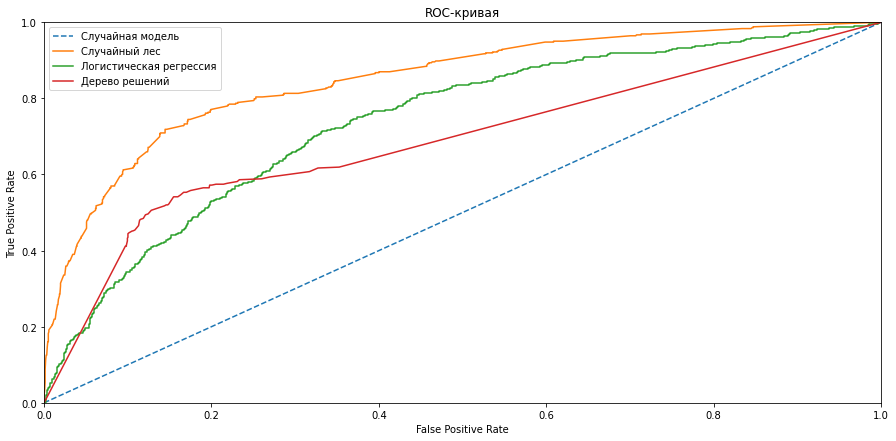

In [50]:
#plt.figure()
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_sl, tpr_sl)
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_dr, tpr_dr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Случайный лес', 'Логистическая регрессия', 'Дерево решений'), loc= 'upper left')
plt.show()

## Борьба с дисбалансом

Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс "1" или класс "0". Подсчитываем количество уникальных значений (он группирует строго одинаковые величины):

0    0.7963
1    0.2037
Name: exited, dtype: float64


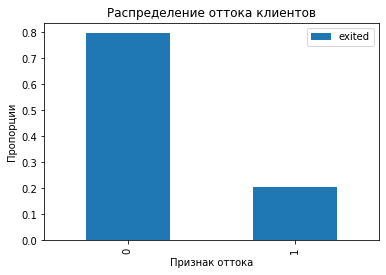

In [51]:
# получим относительные частоты, normalize возвращает пропорции, а не частоты
class_frequency = df_one['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.legend()
plt.xlabel('Признак оттока')
plt.ylabel('Пропорции')
plt.title('Распределение оттока клиентов')
plt.show()

0    0.8795
1    0.1205
dtype: float64


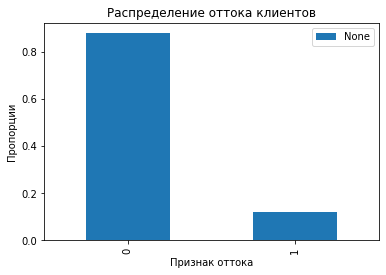

In [52]:
model_sl1 = RandomForestClassifier(random_state=12345, n_estimators=24, max_depth=15)
model_sl1.fit(features_train, target_train)
prediction_valid_sl1 = pd.Series(model_sl1.predict(features_valid))
class_frequency1 = prediction_valid_sl1.value_counts(normalize=True)
print(class_frequency1)
class_frequency1.plot(kind='bar')
plt.legend()
plt.xlabel('Признак оттока')
plt.ylabel('Пропорции')
plt.title('Распределение оттока клиентов')
plt.show()

Баланс классов наблюдается, если их количество примерно равно.

In [53]:
model_sl = RandomForestClassifier(random_state=12345, n_estimators=24, max_depth=15)
model_sl.fit(features_train, target_train)
prediction_valid_sl = pd.Series(model_sl.predict(features_valid))
print('Матрица ошибок RandomForestClassifier:')
print(confusion_matrix(target_valid, prediction_valid_sl))

Матрица ошибок RandomForestClassifier:
[[1520   57]
 [ 239  184]]


### Увеличение выборки (upsample)

In [54]:
# Разделим обучающую выборку на отрицательные и положительные объекты. Объявим 4 переменные:
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    repeat = 4
    
    # Увеличение выборки
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # перемешивание
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


In [55]:
%%time
# обучение на новых данных с помощью модели логистической регрессии
model_log_upsample = LogisticRegression(random_state=12345, solver = 'liblinear')
model_log_upsample.fit(features_upsampled, target_upsampled)
prediction_valid_log_upsample = model_log_upsample.predict(features_valid)
print('Итог LogisticRegression')
print('Accuracy LogisticRegression_upsample:', accuracy_score(target_valid, prediction_valid_log_upsample))
print('Полнота LogisticRegression_upsample: ', recall_score(target_valid, prediction_valid_log_upsample))
print('Точность LogisticRegression_upsample:', precision_score(target_valid, prediction_valid_log_upsample))
print('F1 LogisticRegression_upsample:      ',f1_score(target_valid, prediction_valid_log_upsample))
print('Матрица ошибок LogisticRegression_upsample:')
print(confusion_matrix(target_valid, prediction_valid_log_upsample))

Итог LogisticRegression
Accuracy LogisticRegression_upsample: 0.6975
Полнота LogisticRegression_upsample:  0.6501182033096927
Точность LogisticRegression_upsample: 0.3756830601092896
F1 LogisticRegression_upsample:       0.47619047619047616
Матрица ошибок LogisticRegression_upsample:
[[1120  457]
 [ 148  275]]
CPU times: user 40.2 ms, sys: 4.39 ms, total: 44.6 ms
Wall time: 40.7 ms


F1 LogisticRegression увеличилась с 0.27478260869565213 до 0.47619047619047616

In [56]:
%%time
# обучение на новых данных с помощью модели дерево решений
best_accuracy = 0
best_F1 = 0
best_depth = 0
for depth in range(1, 15):
    model_dr_upsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dr_upsample.fit(features_upsampled, target_upsampled)
    prediction_valid_dr_upsample = model_dr_upsample.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, prediction_valid_dr_upsample))
    print(f1_score(target_valid, prediction_valid_dr_upsample))
    if accuracy_score(target_valid, prediction_valid_dr_upsample) > best_accuracy:
        if f1_score(target_valid, prediction_valid_dr_upsample) > best_F1:
            best_accuracy = accuracy_score(target_valid, prediction_valid_dr_upsample)
            best_F1 = f1_score(target_valid, prediction_valid_dr_upsample)
            best_depth = depth
print()
print('Итог DecisionTreeClassifier_upsample')
print('Accuracy DecisionTreeClassifier_upsample:', best_accuracy)
print('F1 DecisionTreeClassifier_upsample:      ', best_F1)
print('Глубина дерева_upsample:                 ', best_depth)

max_depth = 1 : 0.74
0.48514851485148514
max_depth = 2 : 0.7465
0.5129682997118156
max_depth = 3 : 0.7465
0.5129682997118156
max_depth = 4 : 0.7155
0.5385239253852393
max_depth = 5 : 0.798
0.5809128630705395
max_depth = 6 : 0.7615
0.5643835616438356
max_depth = 7 : 0.771
0.5604606525911708
max_depth = 8 : 0.7585
0.5498602050326189
max_depth = 9 : 0.766
0.5482625482625482
max_depth = 10 : 0.752
0.5258126195028681
max_depth = 11 : 0.7635
0.5168539325842697
max_depth = 12 : 0.7625
0.5158002038735984
max_depth = 13 : 0.7775
0.5199568500539374
max_depth = 14 : 0.7855
0.5152542372881356

Итог DecisionTreeClassifier_upsample
Accuracy DecisionTreeClassifier_upsample: 0.798
F1 DecisionTreeClassifier_upsample:       0.5809128630705395
Глубина дерева_upsample:                  5
CPU times: user 472 ms, sys: 36.2 ms, total: 508 ms
Wall time: 579 ms


F1 DecisionTreeClassifier увеличилась с 0.5337423312883436 до 0.5809128630705395, глубина дерева 5

In [57]:
%%time
# обучение на новых данных с помощью модели случайный лес

best_model_sl = None
best_accuracy = 0
best_F1 = 0
best_depth = 0
best_est = 0
for est in range(5, 50, 5):
    for depth in range(1, 20):
        model_sl_upsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_sl_upsample.fit(features_upsampled, target_upsampled)
        prediction_valid_sl_upsample = model_sl_upsample.predict(features_valid)
        if accuracy_score(target_valid, prediction_valid_sl) > best_accuracy:
            if f1_score(target_valid, prediction_valid_sl_upsample) > best_F1:
                best_model = best_model_sl
                best_accuracy = accuracy_score(target_valid, prediction_valid_sl_upsample)
                best_F1 = f1_score(target_valid, prediction_valid_sl_upsample)
                best_est = est
                best_depth = depth

print()
print('Итог RandomForestClassifier_upsample')
print('Accuracy RandomForestClassifier_upsample:', best_accuracy)
print('F1 RandomForestClassifier_upsample:      ', best_F1)
print('Количество деревьев_upsample:            ', best_est)
print('Глубина дерева_upsample:                 ', best_depth)


Итог RandomForestClassifier_upsample
Accuracy RandomForestClassifier_upsample: 0.8325
F1 RandomForestClassifier_upsample:       0.6206115515288788
Количество деревьев_upsample:             35
Глубина дерева_upsample:                  11
CPU times: user 36.9 s, sys: 144 ms, total: 37.1 s
Wall time: 37.2 s


F1 RandomForestClassifier увеличилась с 0.5513196480938415 до 0.6206115515288788 с количеством деревьев 35 и глубиной дерева 11.

Рассмотрены данные с upsample. Лучшие показатели у случайного леса с параметрами:
- Accuracy RandomForestClassifier: 8325,
- F1 RandomForestClassifier: 0.6206115515288788,
- Количество деревьев: 35,
- Глубина дерева: 11

### Уменьшение выборки (downsample)

In [58]:
# Разделим обучающую выборку на отрицательные и положительные объекты. Объявим 4 переменные:
def downsample(features, target, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    # Уменьшение выборки
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    # перемешивание
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


In [59]:
%%time
# обучение на новых данных с помощью модели логистической регрессии
model_log_downsample = LogisticRegression(random_state=12345, solver = 'liblinear')
model_log_downsample.fit(features_downsampled, target_downsampled)
prediction_valid_log_downsample = model_log_downsample.predict(features_valid)
print('Итог LogisticRegression_downsample')
print('Accuracy LogisticRegression_downsample:', accuracy_score(target_valid, prediction_valid_log_downsample))
print('Полнота LogisticRegression_downsample: ', recall_score(target_valid, prediction_valid_log_downsample))
print('Точность LogisticRegression_downsample:', precision_score(target_valid, prediction_valid_log_downsample))
print('F1 LogisticRegression_downsample:      ',f1_score(target_valid, prediction_valid_log_downsample))
print('Матрица ошибок LogisticRegression_downsample:')
print(confusion_matrix(target_valid, prediction_valid_log_downsample))

Итог LogisticRegression_downsample
Accuracy LogisticRegression_downsample: 0.699
Полнота LogisticRegression_downsample:  0.6713947990543735
Точность LogisticRegression_downsample: 0.38018741633199465
F1 LogisticRegression_downsample:       0.48547008547008547
Матрица ошибок LogisticRegression_downsample:
[[1114  463]
 [ 139  284]]
CPU times: user 42.8 ms, sys: 32.3 ms, total: 75.1 ms
Wall time: 33.9 ms


In [60]:
%%time
# обучение на новых данных с помощью модели дерево решений
best_accuracy = 0
best_F1 = 0
best_depth = 0
for depth in range(1, 15):
    model_dr_downsample = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dr_downsample.fit(features_downsampled, target_downsampled)
    prediction_valid_dr_downsample = model_dr_downsample.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, prediction_valid_dr_downsample))
    print(f1_score(target_valid, prediction_valid_dr_downsample))
    if accuracy_score(target_valid, prediction_valid_dr_downsample) > best_accuracy:
        if f1_score(target_valid, prediction_valid_dr_downsample) > best_F1:
            best_accuracy = accuracy_score(target_valid, prediction_valid_dr_downsample)
            best_F1 = f1_score(target_valid, prediction_valid_dr_downsample)
            best_depth = depth
print()
print('Итог DecisionTreeClassifier_downsample')
print('Accuracy DecisionTreeClassifier_downsample:', best_accuracy)
print('F1 DecisionTreeClassifier_downsample:      ', best_F1)
print('Глубина дерева_downsample:                 ', best_depth)

max_depth = 1 : 0.725
0.4878957169459963
max_depth = 2 : 0.731
0.5109090909090909
max_depth = 3 : 0.7505
0.5261158594491927
max_depth = 4 : 0.7255
0.5405857740585773
max_depth = 5 : 0.8105
0.608066184074457
max_depth = 6 : 0.776
0.588235294117647
max_depth = 7 : 0.7385
0.5440278988666085
max_depth = 8 : 0.748
0.5426497277676952
max_depth = 9 : 0.7535
0.5554553651938684
max_depth = 10 : 0.762
0.5405405405405406
max_depth = 11 : 0.747
0.5262172284644194
max_depth = 12 : 0.7235
0.5040358744394617
max_depth = 13 : 0.7305
0.5217391304347826
max_depth = 14 : 0.7145
0.49602824360105907

Итог DecisionTreeClassifier_downsample
Accuracy DecisionTreeClassifier_downsample: 0.8105
F1 DecisionTreeClassifier_downsample:       0.608066184074457
Глубина дерева_downsample:                  5
CPU times: user 245 ms, sys: 32.2 ms, total: 277 ms
Wall time: 336 ms


In [61]:
%%time
# обучение на новых данных с помощью модели случайный лес

best_model_sl = None
best_accuracy = 0
best_F1 = 0
best_depth = 0
best_est = 0
for est in range(5, 50, 5):
    for depth in range(1, 20):
        model_sl_downsample = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_sl_downsample.fit(features_downsampled, target_downsampled)
        prediction_valid_sl_downsample = model_sl_downsample.predict(features_valid)
        if accuracy_score(target_valid, prediction_valid_sl_downsample) > best_accuracy:
            if f1_score(target_valid, prediction_valid_sl_downsample) > best_F1:
                best_model = best_model_sl
                best_accuracy = accuracy_score(target_valid, prediction_valid_sl_downsample)
                best_F1 = f1_score(target_valid, prediction_valid_sl_downsample)
                best_est = est
                best_depth = depth

print()
print('Итог RandomForestClassifier_downsample')
print('Accuracy RandomForestClassifier_downsample:', best_accuracy)
print('F1 RandomForestClassifier_downsample:      ', best_F1)
print('Количество деревьев_downsample:            ', best_est)
print('Глубина дерева_downsample:                 ', best_depth)


Итог RandomForestClassifier_downsample
Accuracy RandomForestClassifier_downsample: 0.793
F1 RandomForestClassifier_downsample:       0.5818181818181817
Количество деревьев_downsample:             10
Глубина дерева_downsample:                  4
CPU times: user 15.3 s, sys: 55.9 ms, total: 15.4 s
Wall time: 15.4 s


Показатели при уменьшении выборки хуже, чем после увеличения выборки.<br> 
Лучшая модель model_sl_upsample - случайный лес после увеличения выборки с параметрами:<br> 
F1 RandomForestClassifier увеличилась с 0.5513196480938415 до 0.6206115515288788 <br> 
с количеством деревьев 35<br>  и глубиной дерева 11.

### AUC-ROC

In [62]:
probabilities_log = model_log_upsample.predict_proba(features_valid)
probabilities_one_valid_log = probabilities_log[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(target_valid, probabilities_one_valid_log)
auc_roc_log = roc_auc_score(target_valid, probabilities_one_valid_log)
print(auc_roc_log)

0.741732139457419


In [63]:
probabilities_dr = model_dr_upsample.predict_proba(features_valid)
probabilities_one_valid_dr = probabilities_dr[:,1]
fpr_dr, tpr_dr, thresholds_dr = roc_curve(target_valid, probabilities_one_valid_dr)
auc_roc_dr = roc_auc_score(target_valid, probabilities_one_valid_dr)
print(auc_roc_dr)

0.7056722597744469


In [64]:
probabilities_sl = model_sl_upsample.predict_proba(features_valid)
probabilities_one_valid_sl = probabilities_sl[:,1]
fpr_sl, tpr_sl, thresholds_sl = roc_curve(target_valid, probabilities_one_valid_sl)
auc_roc_sl = roc_auc_score(target_valid, probabilities_one_valid_sl)
print(auc_roc_sl)

0.8435833666881035


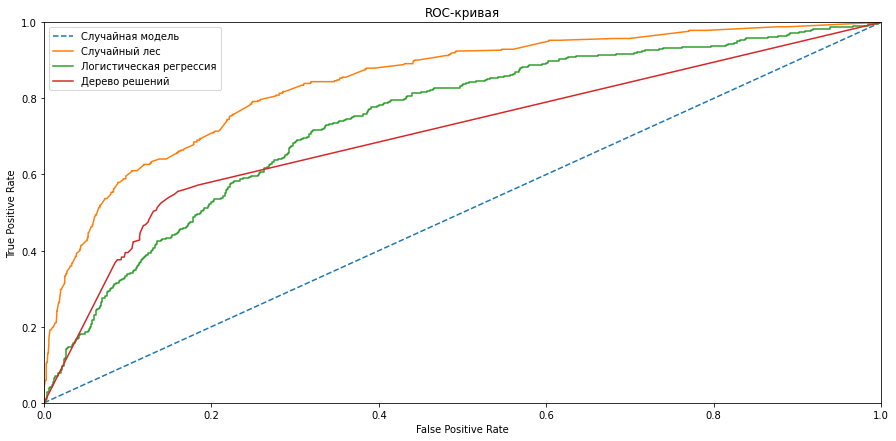

In [65]:
#plt.figure()
plt.figure(figsize=(15,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_sl, tpr_sl)
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_dr, tpr_dr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Случайный лес', 'Логистическая регрессия', 'Дерево решений'), loc= 'upper left')
plt.show()

Лучшее значение метрики auc_roc также у модели 'Случайный лес' - 0.8435833666881035.

## Тестирование модели

Преверим лучшую модель на тестовой выборке

In [66]:
model_sl_upsample = RandomForestClassifier(random_state=12345, n_estimators=35, max_depth=11)
model_sl_upsample.fit(features_upsampled, target_upsampled)
prediction_test_sl_upsample = model_sl_upsample.predict(features_test)
print('Accuracy RandomForestClassifier_upsample:', accuracy_score(target_test, prediction_test_sl_upsample))
print('F1 RandomForestClassifier_upsample:', f1_score(target_test, prediction_test_sl_upsample))
probabilities_sl_t = model_sl_upsample.predict_proba(features_test)
probabilities_one_test_sl_t = probabilities_sl_t[:,1]
fpr_sl_t, tpr_sl_t, thresholds_sl_t = roc_curve(target_test, probabilities_one_test_sl_t)
auc_roc_sl_t = roc_auc_score(target_test, probabilities_one_test_sl_t)
print(auc_roc_sl_t)

Accuracy RandomForestClassifier_upsample: 0.829
F1 RandomForestClassifier_upsample: 0.6122448979591836
0.8487053817165602


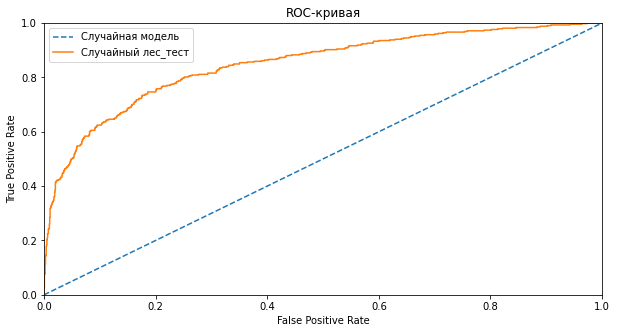

In [67]:
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_sl_t, tpr_sl_t)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Случайный лес_тест'), loc= 'upper left')
plt.show()

In [68]:
#Создаем константную модель
target_constant = pd.Series([0]*len(target_test))
target_constant.value_counts()

0    2000
dtype: int64

In [69]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_constant))
#Дополнительно сравним AUC-ROC 
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_constant))

accuracy_score константой модели: 0.7885
AUC-ROC константой модели: 0.5


## ВЫВОД

In [70]:
# Объединим результаты исследований в таблицу
final_table = {'Логистическая регрессия':np.array([0.274783, 0.476190]),
            'Дерево Решения':np.array([0.533742, 0.580913]), 
            'Случайный лес':np.array([0.551320, 0.620613])}
final_table_1 = pd.DataFrame(final_table, index=['F1 без учета дисбаланса','F1 с учетом дисбаланса'])
final_table_auc = {'Логистическая регрессия':np.array([0.738699, 0.741732]),
            'Дерево Решения':np.array([0.688673, 0.705672]), 
            'Случайный лес':np.array([0.849755, 0.843583])}
final_table__auc1 = pd.DataFrame(final_table_auc, index=['AUC-ROC без учета дисбаланса','AUC-ROC с учетом дисбаланса'])

In [71]:
display(final_table_1)
display(final_table__auc1)

,Логистическая регрессия,Дерево Решения,Случайный лес
F1 без учета дисбаланса,0.274783,0.533742,0.551320
F1 с учетом дисбаланса,0.476190,0.580913,0.620613


,Логистическая регрессия,Дерево Решения,Случайный лес
AUC-ROC без учета дисбаланса,0.738699,0.688673,0.849755
AUC-ROC с учетом дисбаланса,0.741732,0.705672,0.843583


**Вывод** <br> В исходных данных имелось 10000 строк (объекты) и 14 столбцов (признаки: 13 признаков и 1 целевой признак).<br> - Дубликаты отсутствуют.<br>- Пропуски данных были только в 1 столбце ("tenure" (сколько лет человек является клиентом банка) и составили небольшой процент = 9,09. Заменила эти пропуски на наименьшее значение 0 сменили тип данных на int (целое число).<br>- В целевом признаке пропуски отсутствуют.<br>- Названия столбцов приведены к нижнему регистру во избежание ошибок в дальнейшем.<br>- В нашем распоряжении обучающий набор данных (признаки) и целевой признак, который нужно предсказать по остальным признакам. <br> Такие задачи относятся к "обучению с учителем" / бинарная (двоичная) классификация (категориальный целевой признак).<br>В ходе работы удалили лишние столбцы, проверили корреляцию признаков: данных с сильной корреляцией нет, "Мультиколлинеарности" нет.  Применили прямое кодирование (признаки должны быть численные) Оne-hot-encoding: категориальные признаки: 'geography'(страна проживания) - содержит 3 уникальных значения и 'gender' (пол) - содержит 2 уникальных значения, преобразовали в числовые с помощью прямого кодирования. Преобразуем 'geography' и 'gender' техникой OHE. Соответственно, в таблицу, избегая дамми-ловушки, добавились 2 и 1 новых столбца соответственно.
Сформированы выборки df_one_train - обучающая выборка, df_one_test - тестовая выборка, df_one_valid - валидационная выборка в соотношении 3:1:1. Для масштабирования функций мы используем класс StandardScaler - стандартизация данных. Исследован баланс классов. Для борьбы с дисбалансом применялось: увеличение выборки и уменьшение выборки (увеличение выборки принесло лучшие результаты).
<br> <br>**Удалось добиться следующих метрик: F1 = 0.620613, AUC = 0.843583.** <br> Данных показателей удалось добится на модели "Случайный лес" с количеством деревьев 35 и глубиной дерева 11.<br> Сделали это засчёт увеличения меньшего класса для достижения баланса классов. Лучше всего себя показала модель Случайного леса. Хуже всего себя показала модель Логистическая регрессия.